# Twitter Sentimental Analysis


The initial steps for data analysis in Python include:

1. **Data Acquisition:** This dataset is downloaded from this link : https://www.kaggle.com/code/tanulsingh077/twitter-sentiment-extaction-analysis-eda-and-model/notebook
 
2. **Loading the Data:** The Data is in .csv format.

3. **Exploratory Data Analysis (EDA):** EDA is a systematic approach to initial data inspection. It leverages **descriptive analysis** techniques to understand the data better, identify outliers, highlight significant variables, and generally uncover underlying data patterns. Additionally, EDA helps in organizing the data, spotting errors, and assessing missing values.

4. **Data Cleaning:** It's crucial to check the available data and perform tasks such as removing empty columns, standardizing terms, imputing missing data where appropriate, and more.

5. After cleaning, you should conduct a more in-depth exploratory data analysis to further understand the data.

## Add necessary Libraries to the project

In [62]:
from function import *

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split




In [47]:
def random_colours(number_of_colors):
    '''
    Simple function for random colours generation.
    Input:
        number_of_colors - integer value indicating the number of colours which are going to be generated.
    Output:
        Color in the following format: ['#E86DA4'] .
    '''
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

## Loading the Dataset

We have adataset of tweets and we want to figure out if a tweet is : "Negative", "Positive", "Neutral"

First we upload the Dataset:

In [48]:
primary_data = pd.read_csv("Data/sentimental_data.csv")

In [49]:
primary_data.head()

,Unnamed: 0,textID,text,sentiment
0,0,cb774db0d1,"I`d have responded, if I were going",neutral
1,1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,2,088c60f138,my boss is bullying me...,negative
3,3,9642c003ef,what interview! leave me alone,negative
4,4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative


In [50]:
primary_data.shape

(31015, 4)

So We have 31015 tweets in the dataset

## First EDA - Before Cleaning the Data

In [42]:
primary_data.head()

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative


In [43]:
primary_data.describe()

,textID,text,sentiment
count,31014,31014,31014
unique,31014,31014,3
top,cb774db0d1,"I`d have responded, if I were going",neutral
freq,1,1,12547


Lets look at the distribution of tweets in the dataset

In [44]:
temp = primary_data.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,text
1,neutral,12547
2,positive,9685
0,negative,8782


/var/folders/rv/whttr0rs0h71ygvlwqb00mt00000gp/T/ipykernel_31532/1054969745.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment',data=primary_data, palette=random_colours(3))


Text(0.5, 1.0, 'Sentiment Distribution in Primary Data')

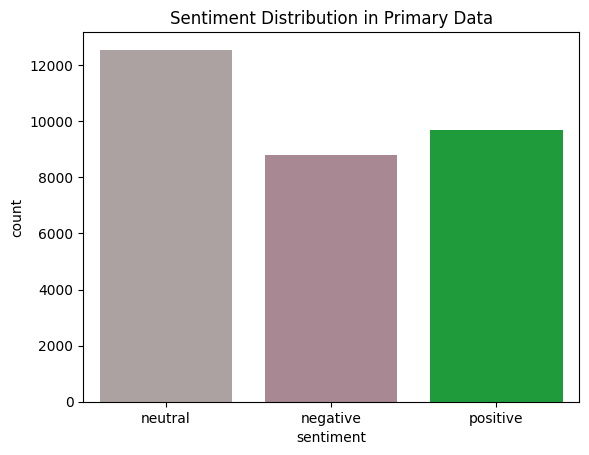

In [63]:
# plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=primary_data, palette=random_colours(3))

# Add a title
plt.title('Sentiment Distribution in Primary Data')

## Cleaning the dataset

### Remove Not important Columns
Remove "Unnamed:0" column

In [51]:
primary_data.drop(columns=["Unnamed: 0"], inplace=True)
primary_data.head()

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative


### Remove NA Values

In [52]:
primary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31015 entries, 0 to 31014
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     31015 non-null  object
 1   text       31014 non-null  object
 2   sentiment  31015 non-null  object
dtypes: object(3)
memory usage: 727.0+ KB


In [53]:
primary_data.isna().sum()

textID       0
text         1
sentiment    0
dtype: int64

We have one null Value in the dataset, we will just remove it

In [54]:
primary_data.dropna(axis = 0, how ='any',inplace=True) 

In [55]:
primary_data.isna().sum()

textID       0
text         0
sentiment    0
dtype: int64

We have no more NA value

### Remove punctutations
There are some Uppercase, lowercase, punctutation in text. so we are going to clean them. What is "clean_text_syntax" exactly doing?

- Make text lowercase
- remove text in square brackets
- remove links
- remove punctuation
- remove words containing numbers

In [59]:
primary_data['text'] = primary_data['text'].apply(str).apply(lambda x: text_preprocessing(x))
primary_data.head()

,textID,text,sentiment
0,cb774db0d1,id have responded if i were going,neutral
1,549e992a42,sooo sad i will miss you here in san diego,negative
2,088c60f138,my boss is bullying me,negative
3,9642c003ef,what interview leave me alone,negative
4,358bd9e861,sons of why couldnt they put them on the relea...,negative


In [61]:
primary_data['text_char_count'] = primary_data['text'].astype(str).apply(len)
primary_data['text_word_count'] = primary_data['text'].apply(lambda x: len(str(x).split()))
primary_data.head()

,textID,text,sentiment,text_char_count,text_word_count
0,cb774db0d1,id have responded if i were going,neutral,33,7
1,549e992a42,sooo sad i will miss you here in san diego,negative,42,10
2,088c60f138,my boss is bullying me,negative,22,5
3,9642c003ef,what interview leave me alone,negative,29,5
4,358bd9e861,sons of why couldnt they put them on the relea...,negative,67,13


## Second EDA - After Cleaning the Data

## Split Data into Train and Test